In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('salaries.csv')

In [3]:
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
comp = LabelEncoder()

In [6]:
df.company = comp.fit_transform(df['company'])
df.job     = comp.fit_transform(df['job'])
df.degree  = comp.fit_transform(df['degree'])

In [7]:
df

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


[Text(223.2, 398.64, 'company <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(111.6, 326.15999999999997, 'degree <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(55.8, 253.67999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(167.39999999999998, 253.67999999999998, 'job <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(111.6, 181.2, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.2, 181.2, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(334.79999999999995, 326.15999999999997, 'company <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(279.0, 253.67999999999998, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(390.59999999999997, 253.67999999999998, 'job <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(334.79999999999995, 181.2, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(446.4, 181.2, 'job <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(390.59999999999997, 108.71999999999997, 'degree <= 0.5\ngini = 0.5

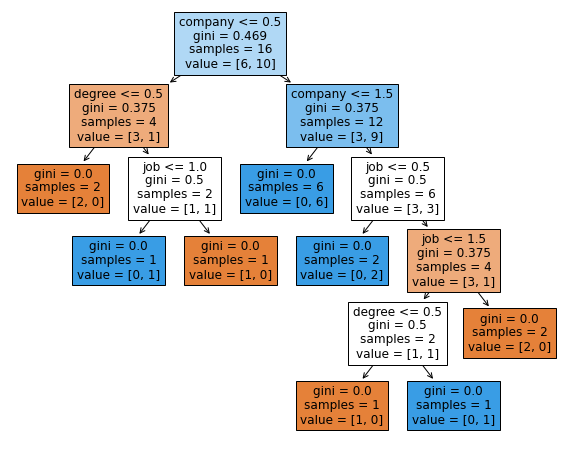

In [8]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clt = DecisionTreeClassifier(random_state=0)
clt.fit(df.iloc[:,:-1],df.iloc[:,-1])
plt.figure(figsize=(10,8))
tree.plot_tree(clt,feature_names=df.columns,filled=True)

In [9]:
X = df.drop('salary_more_then_100k',axis = 1)
y = df.salary_more_then_100k

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=40)

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')

In [11]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [12]:
model.score(X_test,y_test)

1.0

Plot Decision Tree

In [13]:
from sklearn import datasets
from sklearn import tree

In [14]:
iris = datasets.load_iris()

In [15]:
clf = DecisionTreeClassifier(random_state=0,criterion='entropy')
got = clf.fit(iris.data,iris.target)

[Text(418.5, 498.3, 'petal width (cm) <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(354.11538461538464, 407.70000000000005, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(482.8846153846154, 407.70000000000005, 'petal width (cm) <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(257.53846153846155, 317.1, 'petal length (cm) <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(128.76923076923077, 226.5, 'petal width (cm) <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(64.38461538461539, 135.89999999999998, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(193.15384615384616, 135.89999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(386.3076923076923, 226.5, 'petal width (cm) <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginic

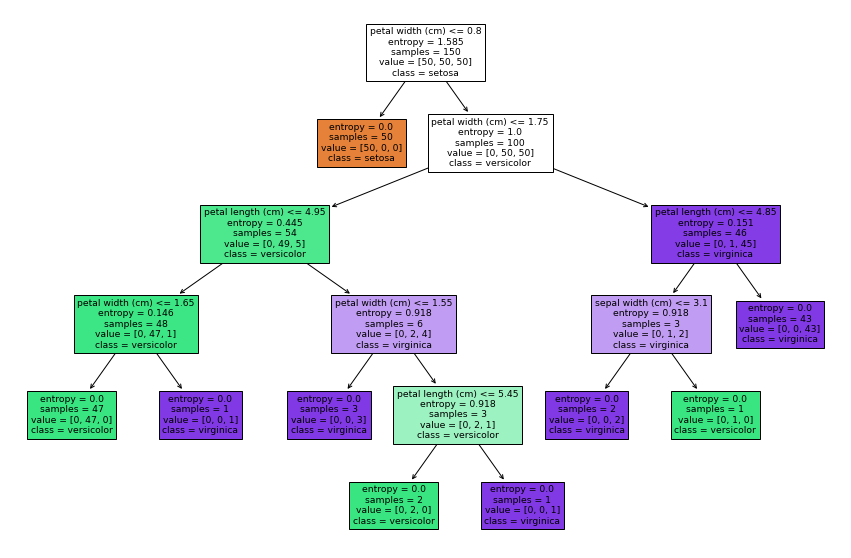

In [16]:
plt.figure(figsize=(15,10))
tree.plot_tree(got,feature_names=iris.feature_names,class_names=iris.target_names,filled = True)

In [17]:
print(tree.export_text(clf,feature_names=iris.feature_names))

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



In [18]:
df = pd.read_csv('weath.csv')

In [19]:
df

,Outlook,Temperature,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [20]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [21]:
df.Outlook = lb.fit_transform(df.Outlook)
df.Temperature = lb.fit_transform(df.Temperature)
df.Humidity = lb.fit_transform(df.Humidity)
df.Wind = lb.fit_transform(df.Wind)

In [22]:
df

,Outlook,Temperature,Humidity,Wind,Decision
0,2,1,0,1,No
1,2,1,0,0,No
2,0,1,0,1,Yes
3,1,2,0,1,Yes
4,1,0,1,1,Yes
5,1,0,1,0,No
6,0,0,1,0,Yes
7,2,2,0,1,No
8,2,0,1,1,Yes
9,1,2,1,1,Yes


In [23]:
from sklearn.tree import DecisionTreeClassifier
clk = DecisionTreeClassifier(random_state=0)
clk.fit(df.iloc[:,:-1],df.iloc[:,-1])

DecisionTreeClassifier(random_state=0)

[Text(248.0, 440.31600000000003, 'Outlook <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(186.0, 342.468, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(310.0, 342.468, 'Humidity <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(186.0, 244.62, 'Outlook <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(124.0, 146.772, 'Wind <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(62.0, 48.924000000000035, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(186.0, 48.924000000000035, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(248.0, 146.772, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(434.0, 244.62, 'Wind <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(372.0, 146.772, 'Temperature <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(310.0, 48.924000000000035, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(434.0, 48.924000000000035, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(496.0, 146.772, 'gini = 0.0\nsamples = 3\nvalue =

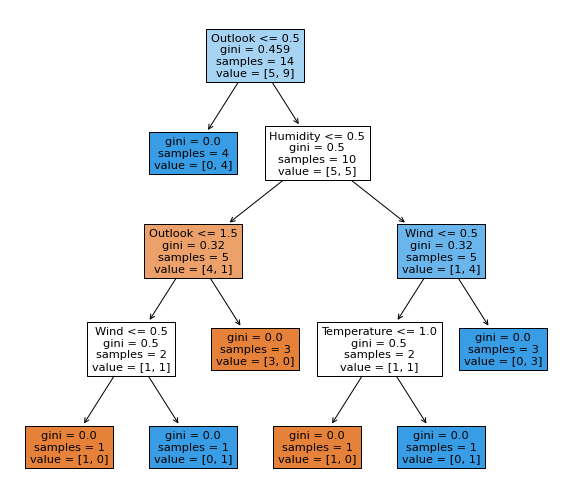

In [24]:
plt.figure(figsize=(10,9))
tree.plot_tree(clk,feature_names=df.columns,filled=True)

# Decision Tree Pruning

In [25]:
import sklearn
sklearn.__version__

'0.23.1'

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [27]:
X,y = load_breast_cancer(return_X_y=True)

In [28]:
X.shape

(569, 30)

In [29]:
y.shape

(569,)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [31]:
clr = DecisionTreeClassifier(random_state=0)
clr.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
pred = clr.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score


In [34]:
accuracy_score(y_test,pred)

0.8811188811188811

[Text(468.32142857142856, 513.4, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(298.9285714285714, 453.0, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(199.28571428571428, 392.6, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(119.57142857142856, 332.2, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(79.71428571428571, 271.8, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(39.857142857142854, 211.39999999999998, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(119.57142857142856, 211.39999999999998, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(79.71428571428571, 151.0, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(159.42857142857142, 151.0, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(119.57142857142856, 90.59999999999997, 'X[1] <= 22.385\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(79.71428571428571

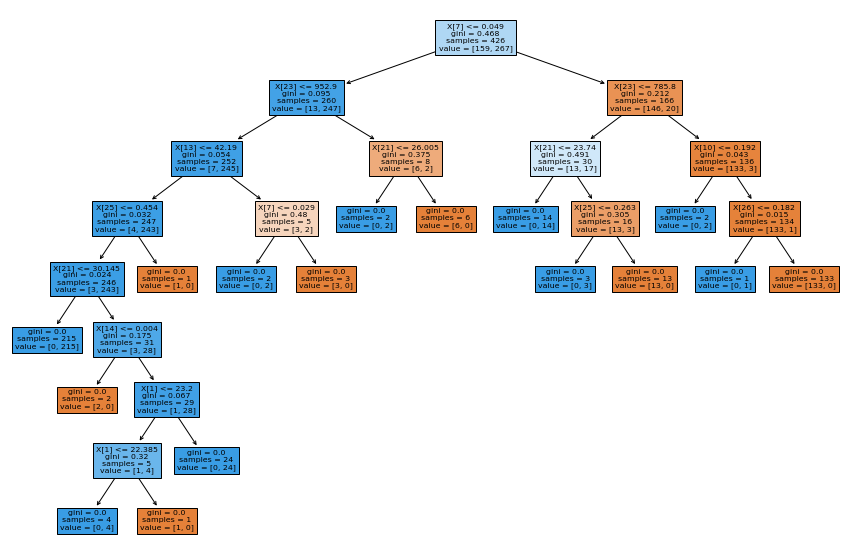

In [35]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clr,filled = True)

Post pruning decision trees with cost complexity pruning
.. currentmodule:: sklearn.tree

The :class:DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In :class:DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

See also minimal_cost_complexity_pruning for details on pruning.

In [36]:
path = clr.cost_complexity_pruning_path(X_train,y_train)

In [37]:
path

{'ccp_alphas': array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
        0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
        0.02314163, 0.03422475, 0.32729844]),
 'impurities': array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
        0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
        0.10634033, 0.14056508, 0.46786352])}

In [38]:
ccp_alphas,impurities = path.ccp_alphas ,path.impurities

In [39]:
clrs = []
for alpha in ccp_alphas:
    clr = DecisionTreeClassifier(random_state=0,ccp_alpha=alpha)
    clr.fit(X_train,y_train)
    clrs.append(clr)

In [40]:
clrs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0022664723976040134, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004647426339100881, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004659799593581376, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005633802816901408, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007042253521126761, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007841938420144537, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.009114019793328328, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.011443661971830986, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.018988002086593604, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.023141627543035996, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.03422474765119576, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.3272984419327777, random_state=0)]

When ccp_alpha is set to zero and keeping the other default parameters of :class:DecisionTreeClassifier, the tree overfits, 
leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating
a decision tree that generalizes better. In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

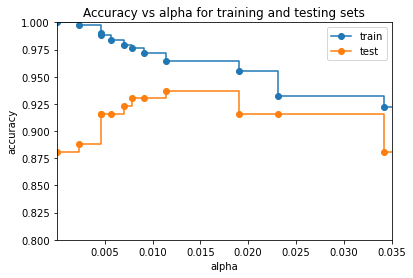

In [41]:
train_scores = [clr.score(X_train, y_train) for clr in clrs]
test_scores  = [clr.score(X_test, y_test)   for clr in clrs]

plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.ylim(0.8,1)
plt.xlim(0.00001,0.035)
plt.title("Accuracy vs alpha for training and testing sets")
plt.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores,  marker='o', label="test", drawstyle="steps-post")
plt.legend()

In [42]:
clr = DecisionTreeClassifier(random_state=0,ccp_alpha=0.012)
clr.fit(X_train,y_train)
pred = clr.predict(X_test)

In [43]:
accuracy_score(y_test,pred)

0.9370629370629371